170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
******************
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
******************
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


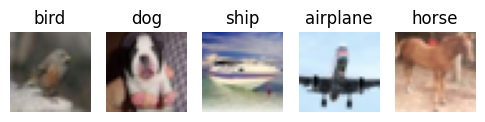

In [1]:
# ------------------------------------------------------------------------------
# VGG16 ON CIFAR_10
#------------------------------------------------------------------------------
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt





#------------------------------------------------------------------------------
#  Loading CIFAR10 data
#------------------------------------------------------------------------------

(X_train, y_train), (X_test, y_test) = k.datasets.cifar10.load_data()

print("******************")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




# Define class names for CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Define the number of random images to display
num_images_to_display = 5

# Set the size of the displayed images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(6, 2))

# Generate random indices for selecting images
random_indices = np.random.choice(X_train.shape[0], num_images_to_display, replace=False)

# Display random images with labels
for i, ax in zip(random_indices, axes):
    image = X_train[i]
    label = y_train[i][0]  # The label is stored as a single number

    # Plot the image
    ax.imshow(image)
    ax.set_title(class_names[label])
    ax.axis('off')



# Convert class vectors to binary class matrices using one hot encoding
y_train_ohe = to_categorical(y_train, num_classes = 10)
y_test_ohe = to_categorical(y_test, num_classes = 10)

# Data normalization
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print("******************")
print(X_train.shape)
print(y_train_ohe.shape)


X_val = X_train[40000:]
y_val = y_train_ohe[40000:]
print(X_val.shape)
print(y_val.shape)


X_train = X_train[:40000]
y_train_ohe = y_train_ohe[:40000]
print(X_train.shape)
print(y_train_ohe.shape)



print(X_test.shape)
print(y_test_ohe.shape)

In [2]:
# Count the number of images in each class for train and test sets
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

In [3]:
from keras.layers import Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
model_checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the model using y_train_ohe (one-hot encoded labels) and y_test_ohe for validation
history = model.fit(X_train, y_train_ohe, validation_data=(X_val, y_val), epochs=20, batch_size=128, callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 269ms/step - accuracy: 0.2724 - loss: 1.9514 - val_accuracy: 0.5005 - val_loss: 1.3624
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 265ms/step - accuracy: 0.4810 - loss: 1.4295 - val_accuracy: 0.5728 - val_loss: 1.1965
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 260ms/step - accuracy: 0.5494 - loss: 1.2538 - val_accuracy: 0.6186 - val_loss: 1.0762
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 257ms/step - accuracy: 0.5985 - loss: 1.1337 - val_accuracy: 0.6570 - val_loss: 0.9714
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 255ms/step - accuracy: 0.6380 - loss: 1.0271 - val_accuracy: 0.6822 - val_loss: 0.9107
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.6658 - loss: 0.9500 - val_accuracy: 0.7012 - val_loss: 0.8538
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 256ms/step - accuracy: 0.6888 - loss: 0.8894 - val_accuracy: 0.7100 - val_loss: 0.8346
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 257ms/step - accuracy: 0.7070 - loss:

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7515 - loss: 0.7906


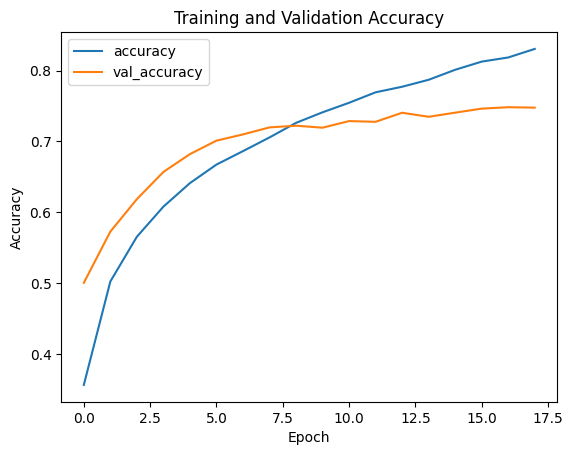

In [6]:
# Afficher les courbes d'accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

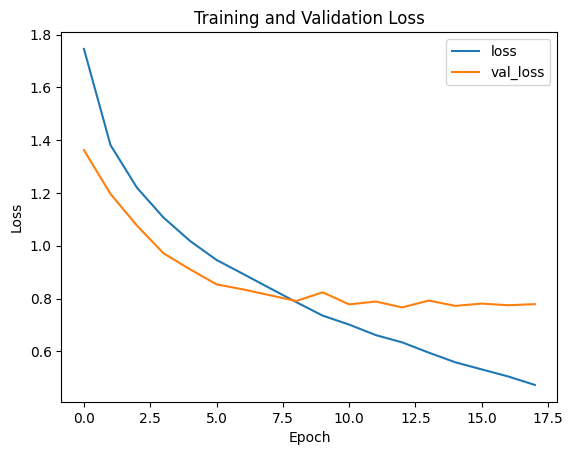

In [7]:
# Afficher les courbes de perte
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7525 - loss: 0.8292


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


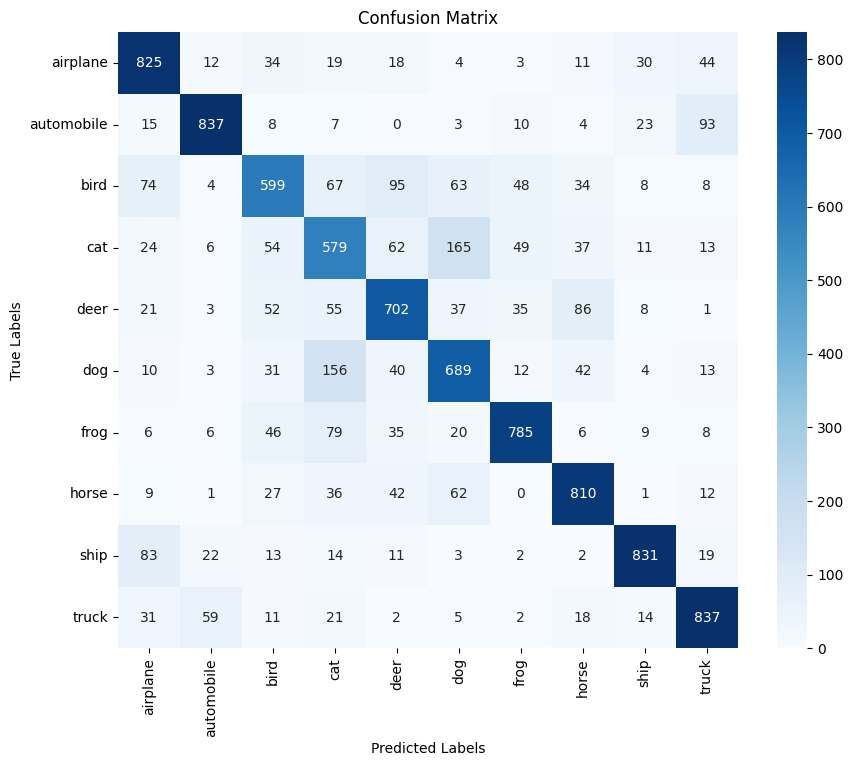

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test set
predictions = model.predict(X_test)

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# If y_test is still one-hot encoded, convert it back to single labels
if len(y_test_ohe.shape) > 1:
    y_test_labels = np.argmax(y_test_ohe, axis=1)
else:
    y_test_labels = y_test

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step


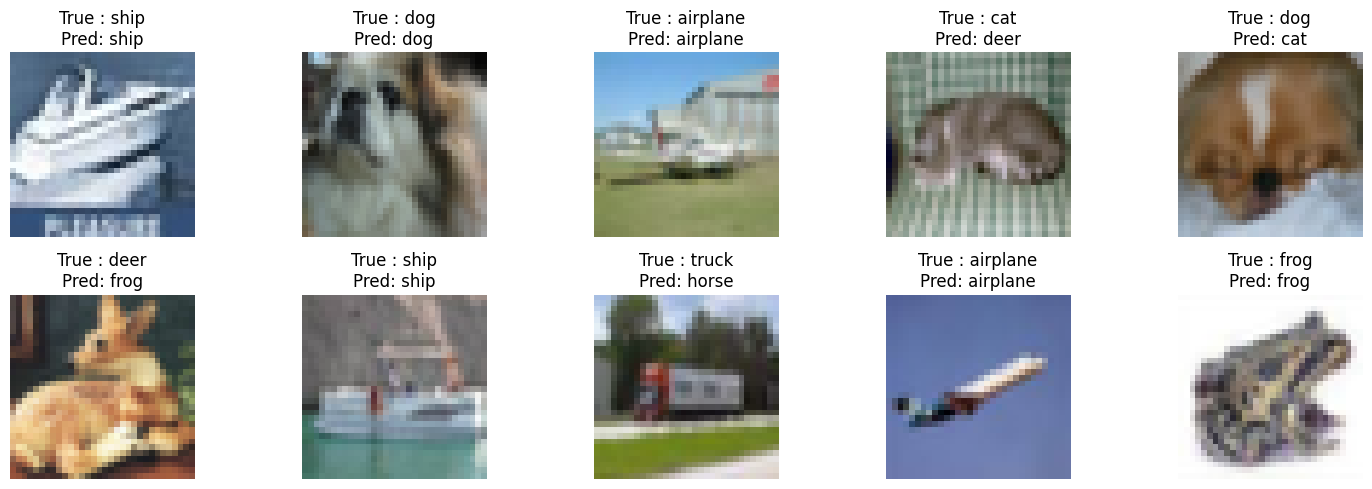

In [9]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Use true labels (not one-hot encoded)
y_true = np.argmax(y_test_ohe, axis=1)

# Display a random subset of images along with true and predicted labels
num_images = 10
indices = np.random.choice(np.arange(X_test.shape[0]), num_images, replace=False)
X_subset = X_test[indices]
y_true_subset = y_true[indices]
y_pred_subset = y_pred_classes[indices]

# CIFAR-10 class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_subset[i])  # No need to reshape, CIFAR-10 images are 32x32 RGB
    plt.title(f"True : {class_labels[y_true_subset[i]]}\nPred: {class_labels[y_pred_subset[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
